In [ ]:
# Nama     : Rizky Syaiful Fattah
# username : rizkyalsyaif
# Noreg    : 1494037162101-2390
# email    : rysfattah@gmail.com
# Submission kelas pembelajaran machine learning
# Aplikasi CNN untuk klasifikasi gambar game rock paper scissors

Import library yang diperlukan

In [ ]:
# tensorflow
import tensorflow as tf

# library unzipping file
import zipfile,os

# library image data generator 
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# library untuk data visualisation and manipulation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# library untuk implementasi callbacks pada model
from keras.callbacks import EarlyStopping, ModelCheckpoint

# library upload foto untuk testing model
from google.colab import files
from tensorflow.keras.preprocessing import image
import matplotlib.image as mpimg
from keras.models import load_model
%matplotlib inline

# library confussion matrix
from sklearn.metrics import classification_report, confusion_matrix

Dataset gambar

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 /root/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d alxmamaev/flowers-recognition

100% 224M/225M [00:11<00:00, 22.9MB/s]
100% 225M/225M [00:11<00:00, 19.9MB/s]


In [ ]:
# melakukan ekstraksi pada file zip
local_zip = '/content/flowers-recognition.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

# base_dir = '/tmp/rockpaperscissors/rps-cv-images'
# train_dir = base_dir
# val_dir = base_dir

In [ ]:
os.listdir('/tmp/flowers')

['sunflower', 'rose', 'dandelion', 'tulip', 'daisy']

In [ ]:
base_dir = '/tmp/flowers'
train_dir = base_dir
val_dir = base_dir

Augmentasi gambar

In [ ]:
train_datagen = ImageDataGenerator(
                    rescale=1./255, # convert the pixels in range [0,255] to range [0,1]
                    rotation_range=20,  # randomly rotate images in the range (degrees, 0 to 180)
                    horizontal_flip=True, # randomly flip images
                    shear_range = 0.2, # Shear angle in counter-clockwise direction in degrees
                    fill_mode = 'nearest', # Points outside the boundaries of the input
                    validation_split = 0.2)  #split data 20% for validation

aplikasi image data generator dengan data split 20% untuk data validasi

In [ ]:
train_generator = train_datagen.flow_from_directory(
        train_dir,  # direktori data latih
        target_size=(150, 150),  # mengubah resolusi seluruh gambar menjadi 150x150 piksel
        batch_size=32,
        subset='training',
        # karena ini merupakan masalah klasifikasi 6 kelas maka menggunakan class_mode = 'categorical'
        class_mode='categorical')

validation_generator = train_datagen.flow_from_directory(
        val_dir, # direktori data validasi
        target_size=(150, 150), # mengubah resolusi seluruh gambar menjadi 150x150 piksel
        batch_size=32,
        subset='validation', 
        # karena ini merupakan masalah klasifikasi 6 kelas maka menggunakan class_mode = 'categorical'
        class_mode='categorical')

Found 3457 images belonging to 5 classes.
Found 860 images belonging to 5 classes.


Developing model yang akan digunakan dengan 4 layer CNN

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(5, activation='softmax')
])

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 74, 74, 16)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 34, 34, 64)        18496     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 17, 17, 64)      

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer=tf.optimizers.Adam(lr=0.001),
              metrics=['accuracy'])

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
# implementasi checkpoint dan early stopping untuk mendapat model terbaik
model_checkpoint = ModelCheckpoint('submission.h5', 
						monitor='accuracy', verbose=1, 
						save_best_only=True, mode='max')
early_stopping = EarlyStopping(monitor='accuracy', patience=20, verbose=1)

Compile model

In [33]:
result = model.fit(
      train_generator,
      steps_per_epoch=50,  # berapa batch yang akan dieksekusi pada setiap epoch
      epochs=100,
      callbacks=[early_stopping, model_checkpoint],
      validation_data=validation_generator, # menampilkan akurasi pengujian data validasi
      validation_steps=5,  # berapa batch yang akan dieksekusi pada setiap epoch
      verbose=1)

Epoch 1/100
50/50 [==============================] - ETA: 0s - loss: 1.3946 - accuracy: 0.3627
Epoch 1: accuracy improved from -inf to 0.36265, saving model to submission.h5
50/50 [==============================] - 13s 237ms/step - loss: 1.3946 - accuracy: 0.3627 - val_loss: 1.2480 - val_accuracy: 0.4563
Epoch 2/100
49/50 [============================>.] - ETA: 0s - loss: 1.1943 - accuracy: 0.4847
Epoch 2: accuracy improved from 0.36265 to 0.48502, saving model to submission.h5
50/50 [==============================] - 12s 233ms/step - loss: 1.1940 - accuracy: 0.4850 - val_loss: 1.2053 - val_accuracy: 0.5125
Epoch 3/100
50/50 [==============================] - ETA: 0s - loss: 1.1220 - accuracy: 0.5512
Epoch 3: accuracy improved from 0.48502 to 0.55125, saving model to submission.h5
50/50 [==============================] - 13s 267ms/step - loss: 1.1220 - accuracy: 0.5512 - val_loss: 1.0589 - val_accuracy: 0.6250
Epoch 4/100
50/50 [==============================] - ETA: 0s - loss: 1.1144 

In [37]:
# load model terbaik yang tersimpan
cnn = load_model('/content/submission.h5')

visualisasi akurasi model

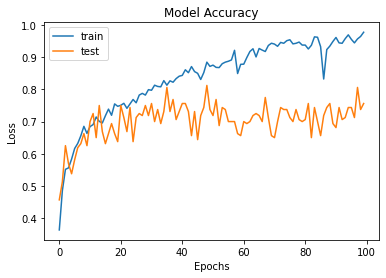

In [34]:
plt.plot(result.history['accuracy'])
plt.plot(result.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

visualisasi loss model

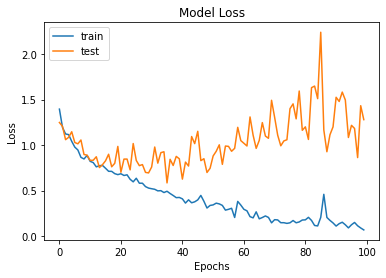

In [35]:
plt.plot(result.history['loss'])
plt.plot(result.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

deploy ML ke TF-Lite

In [38]:
converter = tf.lite.TFLiteConverter.from_keras_model(cnn)
tflite_model = converter.convert()

In [39]:
with tf.io.gfile.GFile('cnn.tflite', 'wb') as f:
  f.write(tflite_model)